<a href="https://colab.research.google.com/github/swagatika1801/AGRISAKHA/blob/main/drone_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/suhelahamed/drone-camera-image-dataset-of-agriculture-fields?resource=downioad")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: swagatikabarik1801
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/suhelahamed/drone-camera-image-dataset-of-agriculture-fields


100%|██████████| 950M/950M [00:05<00:00, 167MB/s]


In [4]:
import os

base_path = "/content/drone-camera-image-dataset-of-agriculture-fields/Kaggle image/extra"
files = os.listdir(base_path)

print("Total images:", len(files))
print(files[:5])


Total images: 25
['DJI_0061_h40.JPG', 'DJI_0071_h45.JPG', 'DJI_0078_h60.JPG', 'DJI_0077_h115.JPG', 'DJI_0081_h80.JPG']


Loading: /content/drone-camera-image-dataset-of-agriculture-fields/Kaggle image/extra/DJI_0061_h40.JPG


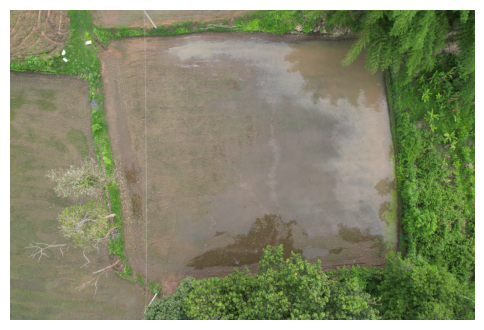

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

img_path = os.path.join(base_path, files[0])
print("Loading:", img_path)

img = cv2.imread(img_path)

if img is None:
    raise ValueError("Image not loaded — path issue")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [6]:
import numpy as np

def extract_patches(image, patch_size=128):
    patches = []
    h, w, _ = image.shape

    for y in range(0, h - patch_size, patch_size):
        for x in range(0, w - patch_size, patch_size):
            patch = image[y:y+patch_size, x:x+patch_size]
            patches.append(patch)

    return patches

patches = extract_patches(img)

print("Number of patches:", len(patches))


Number of patches: 1176


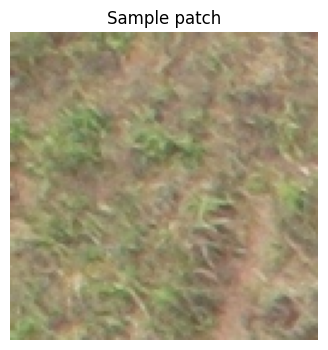

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(patches[0])
plt.title("Sample patch")
plt.axis("off")
plt.show()


In [8]:
from skimage.feature import graycomatrix, graycoprops

def extract_features(patch):
    feats = []

    hsv = cv2.cvtColor(patch, cv2.COLOR_RGB2HSV)
    for i in range(3):
        feats.append(hsv[:,:,i].mean())
        feats.append(hsv[:,:,i].std())

    gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(gray, [1], [0], 256, symmetric=True, normed=True)

    feats.append(graycoprops(glcm, 'contrast')[0,0])
    feats.append(graycoprops(glcm, 'homogeneity')[0,0])
    feats.append(graycoprops(glcm, 'energy')[0,0])
    feats.append(graycoprops(glcm, 'correlation')[0,0])

    return feats


In [9]:
features = extract_features(patches[0])
print("Feature length:", len(features))
print(features)


Feature length: 10
[np.float64(23.0345458984375), np.float64(6.434552794626729), np.float64(73.73297119140625), np.float64(10.384169602343018), np.float64(152.955078125), np.float64(17.66085901108781), np.float64(79.45656988188979), np.float64(0.14339715999439018), np.float64(0.025579347243105222), np.float64(0.84631877222593)]


In [11]:
X = []
all_patches = []

for fname in files:
    img_path = os.path.join(base_path, fname)
    img = cv2.imread(img_path)

    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = extract_patches(img)

    for p in patches:
        X.append(extract_features(p))
        all_patches.append(p)

import numpy as np
X = np.array(X)

print("Final dataset shape:", X.shape)


Final dataset shape: (29400, 10)


In [12]:
print(X[:2])


[[2.30345459e+01 6.43455279e+00 7.37329712e+01 1.03841696e+01
  1.52955078e+02 1.76608590e+01 7.94565699e+01 1.43397160e-01
  2.55793472e-02 8.46318772e-01]
 [1.95398560e+01 5.78880405e+00 7.10303955e+01 9.27433870e+00
  1.54376953e+02 1.75742147e+01 6.16512057e+01 1.62070511e-01
  2.77756716e-02 8.73156070e-01]]


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("Clusters found:", set(labels))


Clusters found: {np.int32(0), np.int32(1), np.int32(2)}


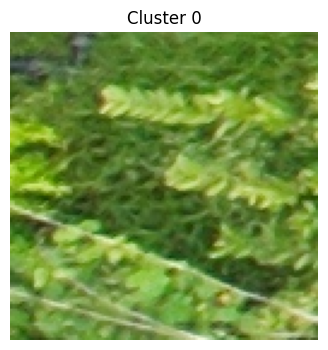

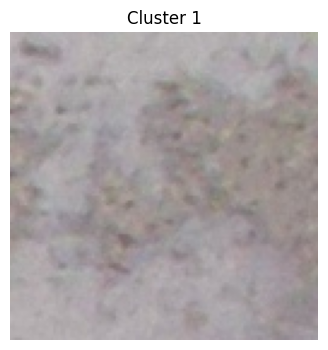

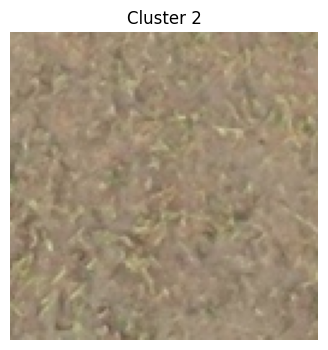

In [14]:
import random
import matplotlib.pyplot as plt

for c in set(labels):
    idx = np.where(labels == c)[0]
    sample_patch = all_patches[random.choice(idx)]

    plt.figure(figsize=(4,4))
    plt.imshow(sample_patch)
    plt.title(f"Cluster {c}")
    plt.axis("off")
    plt.show()


In [1]:
def extract_patches_with_pos(image, patch_size=128):
    patches = []
    positions = []
    h, w, _ = image.shape

    for y in range(0, h - patch_size, patch_size):
        for x in range(0, w - patch_size, patch_size):
            patch = image[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
            positions.append((y, x))

    return patches, positions


In [16]:

import os
import cv2
import numpy as np
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/suhelahamed/drone-camera-image-dataset-of-agriculture-fields?resource=downioad"
dataset_name = "drone-camera-image-dataset-of-agriculture-fields"
download_root_dir = os.path.join("/content", dataset_name)

if not os.path.exists(download_root_dir):
    print(f"Dataset root directory '{download_root_dir}' not found. Attempting to download.")
    od.download(dataset_url, force=True)
    if not os.path.exists(download_root_dir):
        raise FileNotFoundError(f"Dataset root directory still not found after download attempt: {download_root_dir}")
else:
    print(f"Dataset root directory '{download_root_dir}' found.")


base_path = os.path.join(download_root_dir, "Kaggle image", "extra")

if not os.path.exists(base_path):
    raise FileNotFoundError(f"Expected directory '{base_path}' not found within the downloaded dataset. Please verify dataset structure.")


files = os.listdir(base_path)

img_path = os.path.join(base_path, files[0])
print("Using image:", img_path)

img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image not loaded. Path is wrong.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

patches_img, positions = extract_patches_with_pos(img)
X_img = np.array([extract_features(p) for p in patches_img])

X_img_scaled = scaler.transform(X_img)

labels_img = kmeans.predict(X_img_scaled)

print("Patches:", len(patches_img))
print("Labels:", set(labels_img))

Dataset root directory '/content/drone-camera-image-dataset-of-agriculture-fields' found.
Using image: /content/drone-camera-image-dataset-of-agriculture-fields/Kaggle image/extra/DJI_0061_h40.JPG
Patches: 1176
Labels: {np.int32(0), np.int32(1), np.int32(2)}


In [18]:
import os
import cv2
import numpy as np

base_path = "/content/drone-camera-image-dataset-of-agriculture-fields/Kaggle image/extra"
files = os.listdir(base_path)

img_path = os.path.join(base_path, files[0])
print("Using image:", img_path)

img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image not loaded. Path is wrong.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

patches_img, positions = extract_patches_with_pos(img)

X_img = np.array([extract_features(p) for p in patches_img])

X_img_scaled = scaler.transform(X_img)

labels_img = kmeans.predict(X_img_scaled)

print("Patches:", len(patches_img))
print("Labels:", set(labels_img))


Using image: /content/drone-camera-image-dataset-of-agriculture-fields/Kaggle image/extra/DJI_0061_h40.JPG
Patches: 1176
Labels: {np.int32(0), np.int32(1), np.int32(2)}


In [19]:
overlay = img.copy()

cluster_colors = {
    0: [255, 0, 0],
    1: [0, 255, 0],
    2: [0, 0, 255]
}

patch_size = 128

for (y, x), label in zip(positions, labels_img):
    color = cluster_colors[int(label)]
    overlay[y:y+patch_size, x:x+patch_size] = color


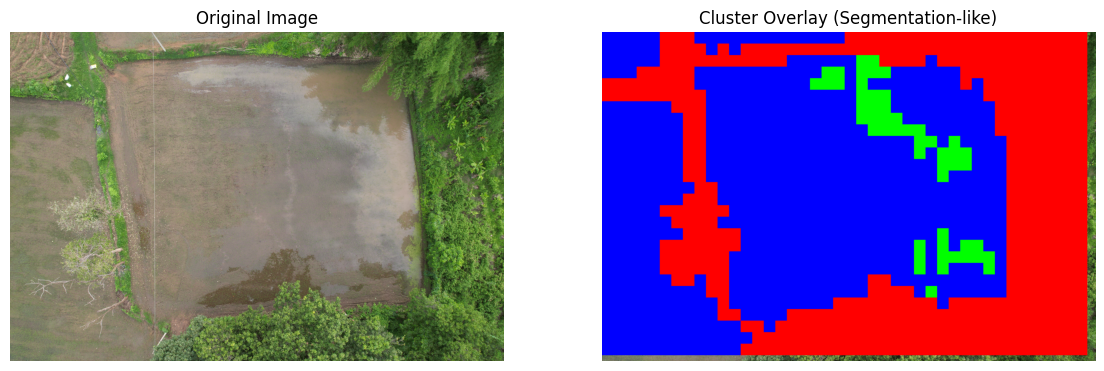

In [20]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(overlay)
plt.title("Cluster Overlay (Segmentation-like)")
plt.axis("off")

plt.show()


In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
db_labels = dbscan.fit_predict(X_scaled)

print("Unique DBSCAN labels:", set(db_labels))


Unique DBSCAN labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


Anomalies found: 156


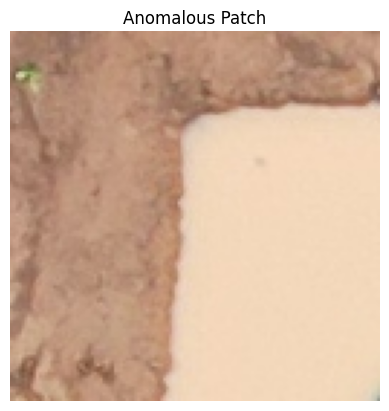

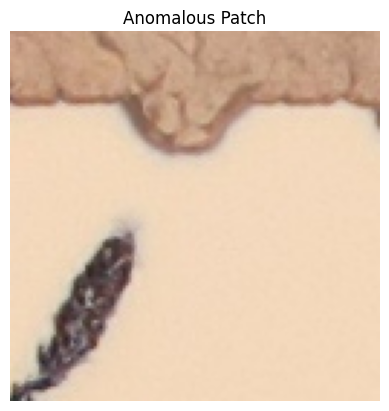

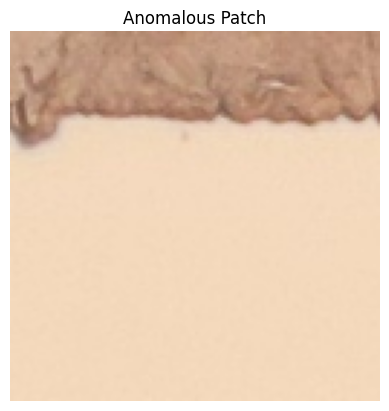

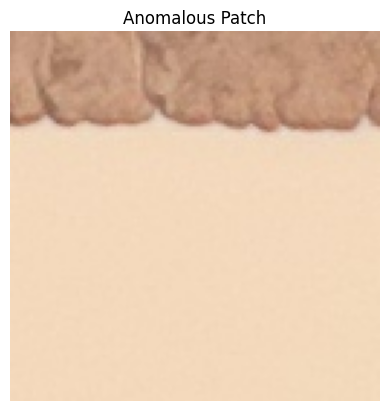

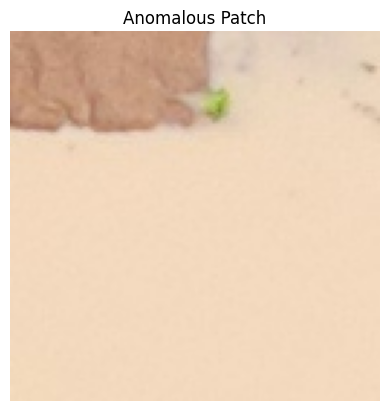

In [22]:
anomaly_idx = np.where(db_labels == -1)[0]

print("Anomalies found:", len(anomaly_idx))

for i in anomaly_idx[:5]:
    plt.imshow(all_patches[i])
    plt.title("Anomalous Patch")
    plt.axis("off")
    plt.show()
